In [1]:
## projet présenté porte sur le sujet 2 de scraping du site imb, à cet effet je vous mettez ici le lien github du projet complet, le sujet de scaping de données est le numéro 2.
## https://github.com/amoungui/my_scrapping_project/tree/master
https://github.com/amoungui/my_scrapping_project/tree/master

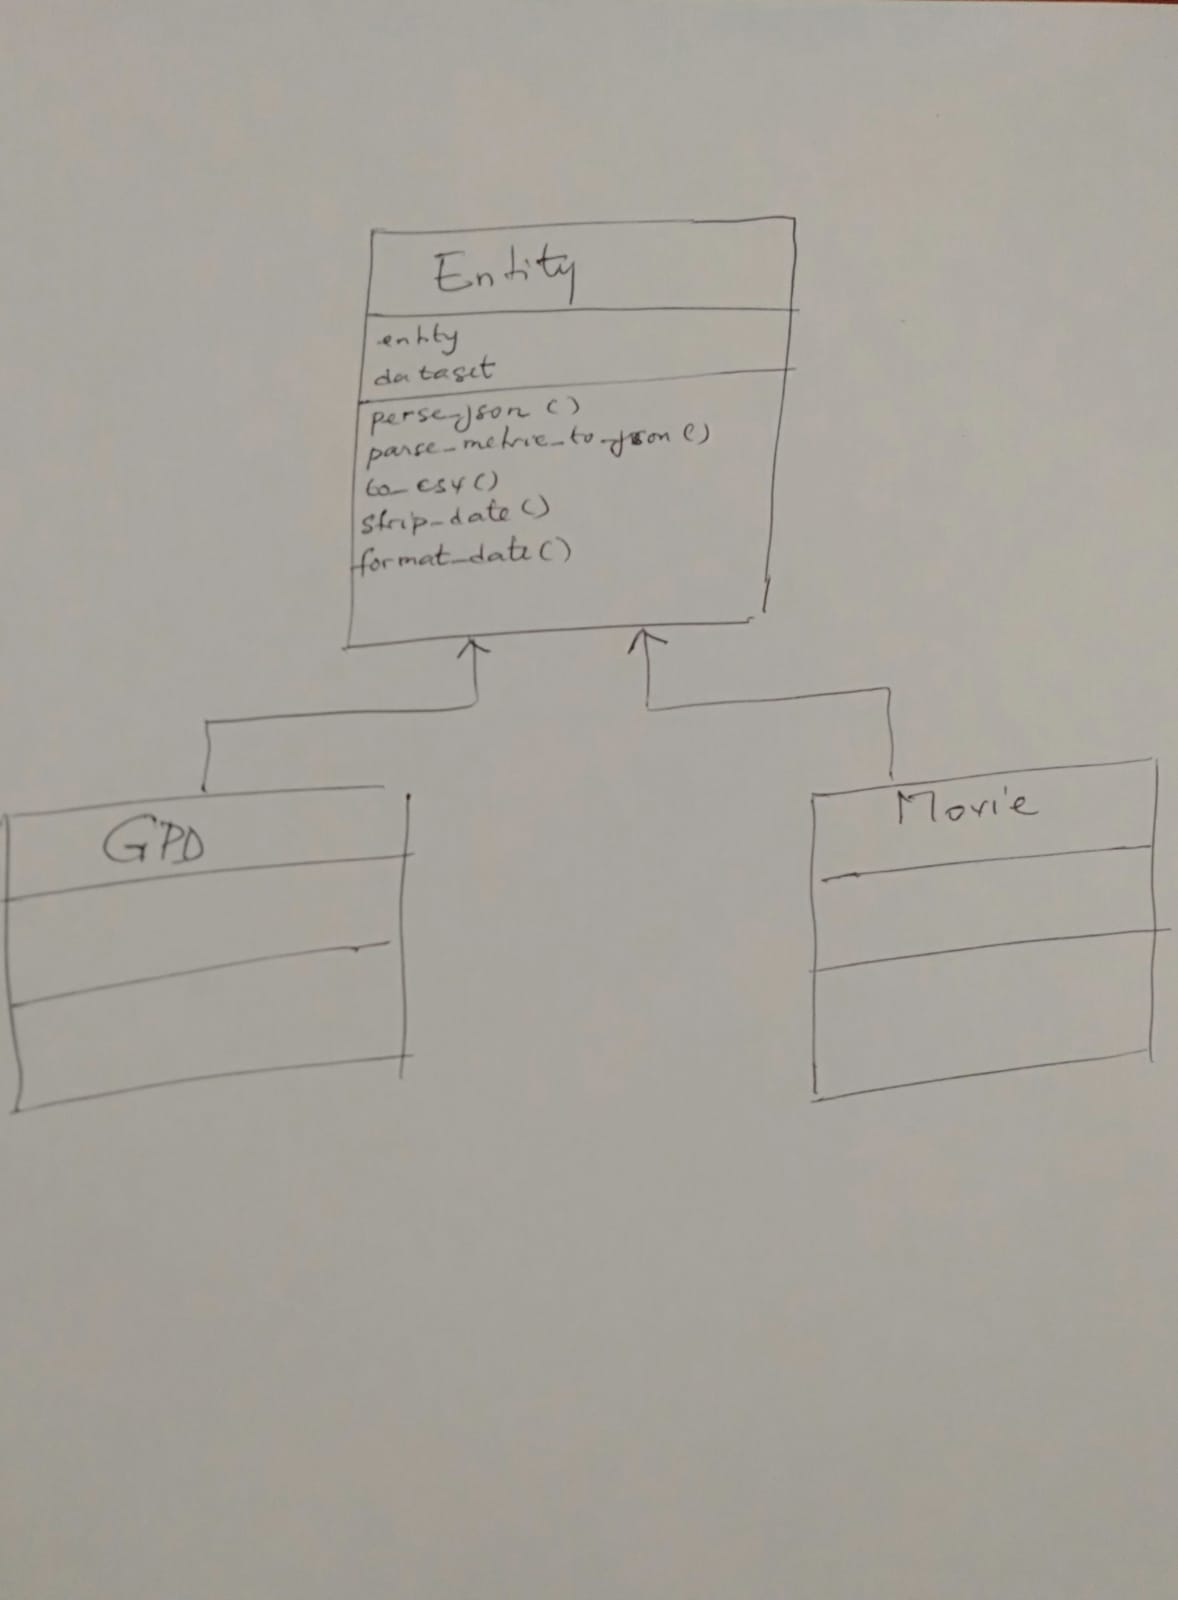

In [4]:
from IPython.display import Image
Image("img/diagrame_de_classes.jpeg", width=50, height=50)

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("data/dataset.csv")

In [11]:
df.head(3) #

,title,rating,score,vote,type,director,writter,duration,release date,release country,...,reviews,storyline,budget en $,Opening weekend USA en $,gross en $,Cumulate Worldwide Gross en $,runtime,sound Mix,Color,Aspect Ratio
0,Hababam Sinifi,9.3,xxx,38228,Comedy; Drama,Ertem Egilmez,Umur Bugay,1h 27min,xxx,Turkey,...,65,"Lazy, uneducated students share a very close b...",xxx,xxx,xxx,xxx,87 min,xxx,xxx,xxx
1,Les Évadés,9.3,80,2395336,Drama,Frank Darabont,Stephen King,2h 22min,xxx,USA,...,9086,Chronicles the experiences of a formerly succe...,25000000.0,72732,28699976,28817291,142 min,Dolby Digital,Color,1.85 : 1
2,Aynabaji,9.2,xxx,23851,Crime; Mystery;,Amitabh Reza Chowdhury,Syed Gaosul Alam Shaon,2h 27min,xxx,Bangladesh,...,173,Ayna is an actor and the prison is his stage. ...,413015.61,xxx,xxx,xxx,147 min,xxx,xxx,xxx


In [38]:
## 1. Distribution des films par catégorie 

In [5]:
data = df
data = data.set_index('type')
data.groupby('type')['title'].apply(lambda x: x)

type
Comedy; Drama         Hababam Sinifi
Drama                     Les Évadés
Drama                Soorarai Pottru
Drama                        Peranbu
Drama              C/o Kancharapalem
Crime; Mystery;             Aynabaji
Crime; Drama              Le parrain
Name: title, dtype: object

In [6]:
## 2. Top 50 des budgets des films
data = df
data[['budget en $', 'title']].sort_values('budget en $', ascending=True).head(50)

,budget en $,title
4,2059096.87,Soorarai Pottru
1,25000000.0,Les Évadés
2,413015.61,Aynabaji
3,6000000.0,Le parrain
5,960911.87,Peranbu
0,xxx,Hababam Sinifi
6,xxx,C/o Kancharapalem


In [33]:
## 3. Nombre de films sortie par décennie

In [7]:
def format(x):
    if 'xxx' in x :
        return '2000-01-01'
    if 'xxx' not in x :
        return x
df['release date'] = df['release date'].apply(lambda x: format(x))        



In [8]:
df['release date'] = pd.to_datetime(df['release date'])
data = df.set_index('release date')
data.groupby((data.index.year//10)*10).sum()

,rating,vote,reviews
release date,,,
2000,64.1,4214638,16216


In [59]:
## 4 Top 20 films ayant générés le plus de revenu, le moins de revenu.

In [60]:
## 4.1. Top 20 films ayant générés le plus de revenu.

In [88]:
df[['title', 'Cumulate Worldwide Gross en $']].sort_values('Cumulate Worldwide Gross en $', ascending=True).head(10)

,title,Cumulate Worldwide Gross en $
412,P.K.,100370104
391,Portrait de la jeune fille en feu,10043341
10,The Dark Knight : Le Chevalier noir,1005973645
32,Fight Club,101209702
823,Le roman de Mildred Pierce,10128
763,Butch Cassidy et le Kid,102310697
625,Zootopie,1023792558
296,Mandarines,1024132
500,Jurassic Park,1033928303
759,Un violon sur le toit,10405457


In [38]:
## 4.2. Top 20 films ayant générés le moins de revenu.

In [89]:
df[['title', 'Cumulate Worldwide Gross en $']].sort_values('Cumulate Worldwide Gross en $', ascending=False).tail(5)

,title,Cumulate Worldwide Gross en $
823,Le roman de Mildred Pierce,10128
32,Fight Club,101209702
10,The Dark Knight : Le Chevalier noir,1005973645
391,Portrait de la jeune fille en feu,10043341
412,P.K.,100370104


In [40]:
## 5. Analyse de la popularité des films en fonction de leurs budgets

In [90]:
data = df
data = data.set_index('budget en $')
data.groupby(by='vote', axis=0, sort=True)[['title', 'vote']].apply(lambda x: x).sort_values('vote', ascending=False)

,title,vote
budget en $,,
25000000.0,Les Évadés,2394627
185000000.0,The Dark Knight : Le Chevalier noir,2356402
160000000.0,Inception,2114470
63000000.0,Fight Club,1892543
8000000.0,Pulp Fiction,1862796
...,...,...
xxx,Et pourtant nous sommes né,5027
xxx,Varljivo leto '68,5027
xxx,Devasuram,5022


In [ ]:
## 6. Distribution des revenus générés par genre de film

In [91]:
data = df
data = df.set_index('type')
data.groupby(by='type')[['title', 'gross en $']].apply(lambda x: x).sort_values('gross en $', ascending=True)

,title,gross en $
type,,
Action; Crime;,Troupe d'élite - L'ennemi intérieur,100119
Crime; Drama; M,Seven,100125643
Drama; Sport,Million Dollar Baby,100492203
Drama; Western,Impitoyable,101157447
Crime; Drama; F,Le roman de Mildred Pierce,10128
...,...,...
Comedy; Crime;,Saban Oglu Saban,xxx
Crime; Drama; T,L'idiot !,xxx
Crime; Drama; T,Sur les quais...,xxx


In [ ]:
## 7. Top 10 des films par retour sur investissement

In [98]:
def convert_(x):
    if x in 'xxx' or 'INR' in x:
        return 1

    else:
        return float(x) # INR56300000            

In [93]:
df['Cumulate Worldwide Gross en $'] = df['Cumulate Worldwide Gross en $'].apply(lambda x: convert_(x))

In [94]:
df['budget en $'] = df['budget en $'].apply(lambda x: convert_(x))

In [95]:
data = df
data['roi'] = data['budget en $']/data['Cumulate Worldwide Gross en $']

In [102]:
data['roi'].sort_values()

92     2.276165e-09
615    8.255853e-09
409    8.490249e-09
412    9.963126e-09
297    1.218001e-08
           ...     
293    9.400000e+06
358    1.000000e+07
411    1.099000e+07
244    3.500000e+07
291    4.000000e+07
Name: roi, Length: 840, dtype: float64

In [45]:
## 8. Note moyenne par année de sortie de film

In [103]:
data = df.set_index('release date')
data.groupby(by=data.index.year, axis=0, sort=True)[['title', 'rating']].sum().sort_values('rating', ascending=False)

,rating
release date,
2019,256.9
2014,227.7
2016,190.4
2018,183.3
2000,164.7
...,...
1940,8.1
1923,8.1
1922,8.1


In [71]:
## Mes propositions d'analyse du dataset

In [72]:
## 9. calculer le ration des budgets des films sorties par pays par année

In [108]:
def convert_int(x):
    if x in 'xxx':
        return 0
    else:
        return float(x) # .replace('.', '')

In [105]:
df.pivot_table(values='budget en $', index='release date', columns='release country')

release country,Africa,Algeria,Arabia,Argentina,Australia,Bahamas,Bangladesh,Belgium,Brazil,Bulgaria,...,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Uganda,Union,Yugoslavia
release date,,,,,,,,,,,,,,,,,,,,,
1921-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1921-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,250000.0,NaN,NaN,NaN
1922-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1923-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,121000.0,NaN,NaN,NaN
1924-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## 10. Determiner le score et types de film produit par auteur(writter) 

In [109]:
data = df.reset_index()
data['score'] = data['score'].apply(lambda x: convert_int(x))
data_pivot = data.pivot_table(values='score', index='writter', columns='type')
data_pivot

type,Action; Adventu,Action; Biograp,Action; Comedy;,Action; Crime;,Action; Drama,Action; Drama;,Action; Mystery,Action; Romance,Action; Sci-Fi,Action; Sci-Fi;,...,Film-Noir; Myst,Horror,Horror; Mystery,Horror; Sci-Fi,Horror; Thrille,Mystery; Romanc,Mystery; Sci-Fi,Mystery; Thrill,Thriller; Myste,Western
writter,,,,,,,,,,,,,,,,,,,,,
A.K. Lohithadas,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.N. Balakrishnan,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.R. Murugadoss,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Guzikowski,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abbas Kiarostami,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zeki Demirkubuz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zenzô Matsuyama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zoya Akhtar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
## 11. determination du nombre de vote total que chaque compositeur (Writter) a pu avoir dans toute sa carrière de cinéaste
data_pivot.sum(axis=1)

writter
A.K. Lohithadas       0.0
A.N. Balakrishnan     0.0
A.R. Murugadoss       0.0
Aaron Guzikowski     70.0
Abbas Kiarostami      0.0
                     ... 
Zeki Demirkubuz       0.0
Zenzô Matsuyama       0.0
Zoya Akhtar          65.0
xxx                  90.0
Özge Efendioglu       0.0
Length: 658, dtype: float64

In [ ]:
## représentation du budget de réalisation en fonction du retour sur investissement

C:\Users\Amoungui\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Amoungui\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Amoungui\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2065: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='budget en $', ylabel='Cumulate Worldwide Gross en $'>

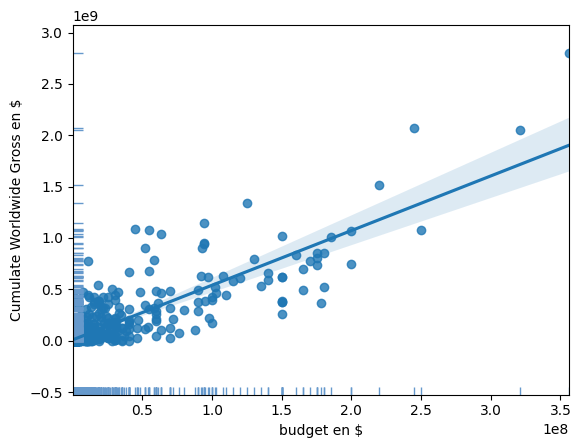

In [111]:
fig, ax = plt.subplots()
sns.regplot(x="budget en $", y="Cumulate Worldwide Gross en $", data=d, ax=ax, lowess=False)  
# adding the small lines to indicate individual data points
sns.rugplot(d["budget en $"].dropna(), axis='x', 
            color="#6699cc", height=0.02, ax=ax)
sns.rugplot(d["Cumulate Worldwide Gross en $"].dropna(), axis='y', 
            color="#6699cc", height=0.02, ax=ax)